
**Topic:** Correlation between students demographics vs academic performance


**Group 12:** Randy Pham, Martin Deguzman, Shubham Kusre, Jeremy Martinez Garcia, Cresencio Rey Carlos











**Dataset:** https://archive.ics.uci.edu/dataset/320/student+performance

**Clustering:** Explore whether there are natural groupings or clusters of students based on their characteristics

**Techniques:**
Unsupervised learning
K-means clustering(Gender, Age, Grade Level, etc.)
Supervised Learning
KNN(K-Nearest Neighbor) (Classification of students alike )


**Description:**
Explore the demographic of students. For example, what gender, age, weekly study time, the time it takes to commute to school, household income, etc, and compare these to the student performance to find correlations. We also want to see if multiple situations compound with each other to make a worse/better situation for the students. With this, we can hopefully draw a conclusion on what affects student academic performance


**Hypothesis:**
Students who receive more family support and extra educational support are expected to have better academic performance and a lower likelihood of dropout. Students who spend more time studying are likely to achieve higher grades in all courses
Higher alcohol consumption among students may negatively impact their academic performance and increase the likelihood of dropout.
There may be differences in academic performance between male and female students, with one gender outperforming the other in certain subjects.
Students whose parents have higher levels of education are more likely to perform better academically compared to students with parents who have lower levels of education.
Students living closer to campus have a higher chance of being successful within classes.
Students with educated parents are more likely to excel in school because their parents are more likely to help their children with their homework.
Students who participate in more extracurricular activities have increased academic performance

**Features (and meanings) in data set:**


	School - MS or GP
	Sex
	Age (16-22)
	Address - U (urban) or R (rural)
	Famsize - LE3 (less or equal to 3) or GT3 (>3)
	Pstatus -  T (living together) or A (living apart)
	Medu/Fedu (Mothers education/Fathers education):
      0 - none
      1 - primary education (< 4th grade)
      2 - 5th to 9th
      3 - secondary education
      4 - higher education  
	Mjob/Fjob (Mothers/Fathers job):
      ‘Teacher’
      ‘Health’ - health care-related
      'services' - civil services
      ‘at home’
      ‘other’ - etc
	Reason (reason to choose this school):
      Course = course preference
      Home = close to home
      Reputation
      Other

	Guardian (mother, father, or other)

	Traveltime (home to school in minutes):
      1 - <15
      2 - 15 to 30
      3 - 30 to 60
      4 - >1 hour

	Study time (weekly study time in hours)
    1 - < 2
    2 - 2 to 5
    3 - 5 to 10
    4 - > 10

	Failures - # of past class failures

	Schoolsup - extra educational support (yes or no)

	Famsup - family educational support (yes or no)

	Paid - extra paid classes within course subject (yes or no)

	Activities - extracurricular activities (yes or no)

	Nursery - attended nursery school (yes or no)

	Higher - wants to take higher education (yes or no)

	internet - internet access at home (yes or no)

	Romantic - in a romantic relationship (yes or no)

	Famrel - quality of family relationships
      1 - very bad to 5 - excellent

	Freetime - free time after school
      1 - very low to 5 - very high

    Goout - going out with friends
      1 - very low to 5 - very high

    Dalc - workday alcohol consumption
      1 -  very low to 5 - very high

    Walc - weekend alcohol consumption
      1 - very low to 5 - very high
	  
    Health - current health status
      1 - very bad to 5 -very good
	  
    Absences - $ of school absences
      0 to 93

    G1, G2, G3 - 1st period grade, 2nd period grade, and final grade:
      0 to 20

**Demographics:**

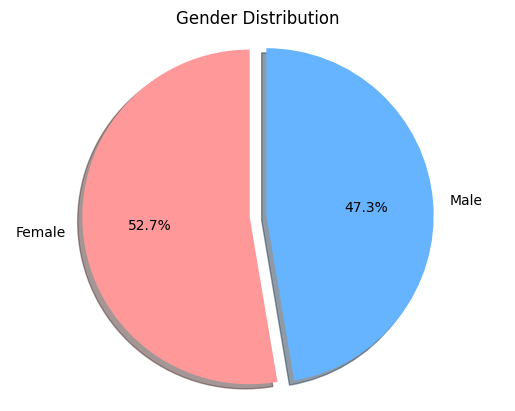

In [ ]:
# EDA (Jeremy Martinez Garcia)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import graphviz
import seaborn as sns

math_df = pd.read_csv("student-mat.csv", delimiter=";")
Num_Gender = math_df["sex"].value_counts()

Num_Gender
data = {
    'Category': ['Female', 'Male'],
    'Value': [Num_Gender['F'], Num_Gender['M']],
}

gender_df = pd.DataFrame(data)

# Pie chart
explode = (0.1, 0)
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(gender_df['Value'], explode=explode, labels=gender_df['Category'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Gender Distribution')
plt.show()

The above pie graph serves to show that the distribution of gender is relatively equal, containing a small difference but majority female. This means that the sampling method used by those who gathered the data will likely not interfere in our hypotheses.

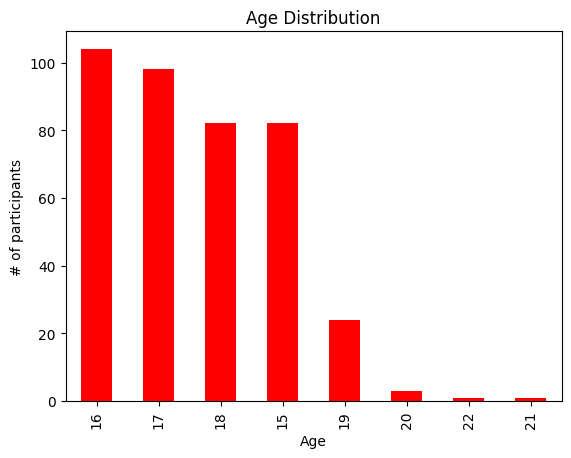

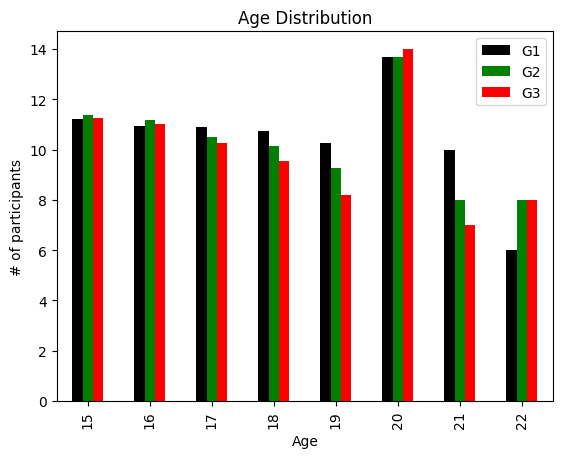

In [ ]:
# bar graph
Num_age = math_df["age"].value_counts()
Num_age.plot(kind='bar',color='red')
plt.xlabel('Age')
plt.ylabel('# of participants')
plt.title('Age Distribution')
plt.show()

age = math_df['age']
Grade_pivot = math_df.pivot_table(index=age,values=['G1','G2','G3'],aggfunc='mean')
color = {"black","red","green"}
Grade_pivot.plot(kind='bar',color=color)
plt.xlabel('Age')
plt.ylabel('# of participants')
plt.title('Age Distribution')

plt.show()

In terms of the 1st distribution, we can see that the students range from 16-22 yrs old, with a majority being 16 years old. One possible confounding variable is visible here, in that of the effect that age has on grades, which is demonstrated in the 2nd graph. We see that the small sample of 20 yr olds have  significantly higher average scores (on average) compared to the rest of the students. Ultimately, because the older students (19-22) have a smaller sample, we believe this will not have a concerning effect on our hypotheses.

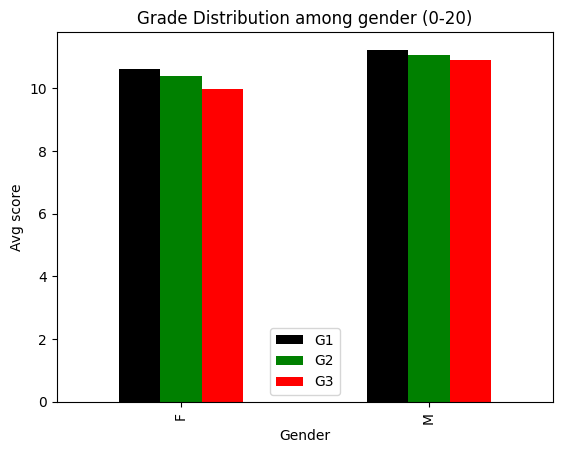

In [ ]:

gender_pivot = math_df.pivot_table(index=['sex'],values=['G1','G2','G3'],aggfunc='mean')
color = {"black","red","green"}
gender_pivot.plot(kind='bar',color=color)
plt.xlabel('Gender')
plt.ylabel('Avg score')
plt.title('Grade Distribution among gender (0-20)')
plt.show()

This figure depicts the average score for each grading period versus the gender of the students. Even though there are more females than males, the average score per grading period is a small amount higher for males.

**Family Support and Academic Performance**

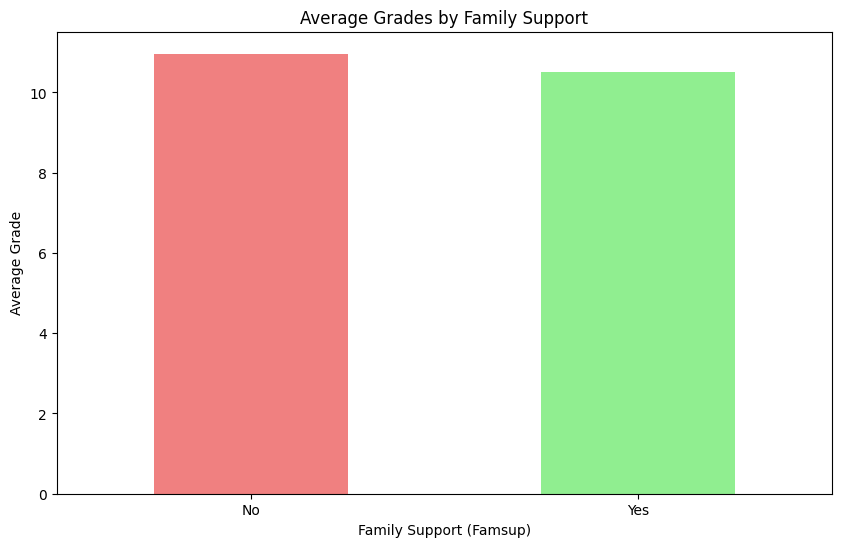

In [ ]:
#Cresencio (Family Support and Academic Performance)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

math_df = pd.read_csv("student-mat.csv", delimiter=";")

features = ["famsup", "Medu", "Fedu", "G1", "G2", "G3"]

filtered_data = math_df[features].copy()

# Calculate the average grade across all three periods
filtered_data.loc[:, "Avg_Grade"] = filtered_data[["G1", "G2", "G3"]].mean(axis=1)

mean_avg_grade_by_famsup = filtered_data.groupby("famsup")["Avg_Grade"].mean()

plt.figure(figsize=(10, 6))
mean_avg_grade_by_famsup.plot(kind="bar", rot=0, color=["lightcoral", "lightgreen"])
plt.title("Average Grades by Family Support")
plt.xlabel("Family Support (Famsup)")
plt.ylabel("Average Grade")
plt.xticks(range(len(mean_avg_grade_by_famsup.index)), ["No", "Yes"])  # Customize x-axis labels
plt.show()


It is observed that students without family support tend to have higher grades compared to those who receive family support. This suggests that there may be other factors other than family support influencing academic performance.

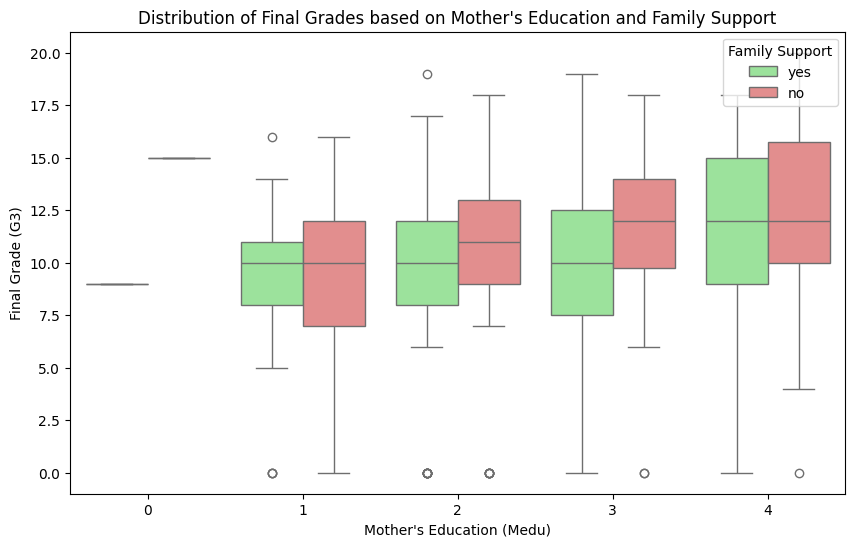

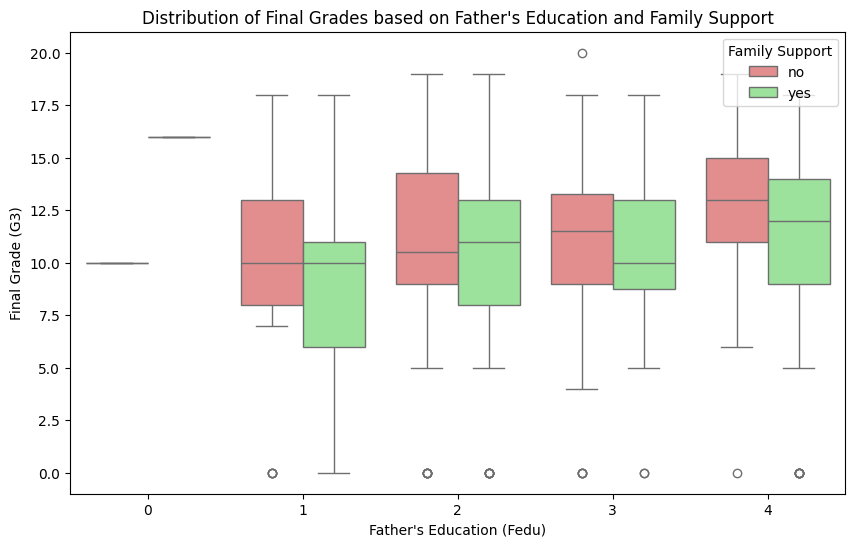

In [ ]:
custom_palette = {"yes": "lightgreen", "no": "lightcoral"}

# Mother Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Medu", y="G3", data=math_df, hue="famsup", palette=custom_palette)
plt.title("Distribution of Final Grades based on Mother's Education and Family Support")
plt.xlabel("Mother's Education (Medu)")
plt.ylabel("Final Grade (G3)")
plt.legend(title="Family Support", loc="upper right")
plt.show()

# Father Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Fedu", y="G3", data=math_df, hue="famsup", palette=custom_palette)
plt.title("Distribution of Final Grades based on Father's Education and Family Support")
plt.xlabel("Father's Education (Fedu)")
plt.ylabel("Final Grade (G3)")
plt.legend(title="Family Support", loc="upper right")
plt.show()


These box plots serve to find a correlation between parental education levels and the final grades of students. As we can see as the parent education level rises so do the final grades. This difference is especially higher for the mother's education level (Medu). It is suprising to find that the highest final grades were earned by students without family support with a mother with higher education.

**Study Times and Academic Performance**

        studytime          G1          G2          G3
count  395.000000  395.000000  395.000000  395.000000
mean     2.035443   10.908861   10.713924   10.415190
std      0.839240    3.319195    3.761505    4.581443
min      1.000000    3.000000    0.000000    0.000000
25%      1.000000    8.000000    9.000000    8.000000
50%      2.000000   11.000000   11.000000   11.000000
75%      2.000000   13.000000   13.000000   14.000000
max      4.000000   19.000000   19.000000   20.000000


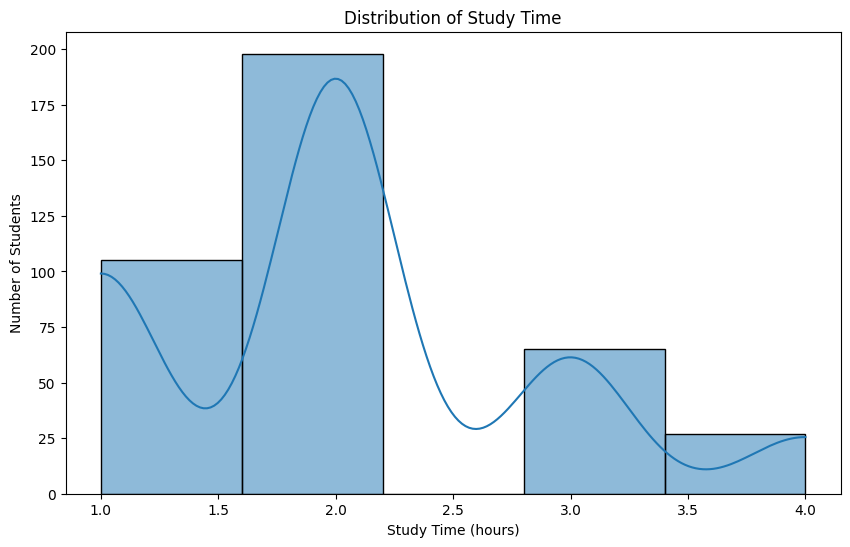

In [ ]:
#Cresencio (Study Times and Academic Performance )

study_time_data = math_df[["studytime", "G1", "G2", "G3"]]
print(study_time_data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(study_time_data["studytime"], bins=5, kde=True)
plt.title("Distribution of Study Time")
plt.xlabel("Study Time (hours)")
plt.ylabel("Number of Students")
plt.show()



This histogram presents the distribution of study time among all students. Notably, the majority of students allocate between 1.5 and 2 hours for studying, indicating a prevalent study duration within this range among the student population.

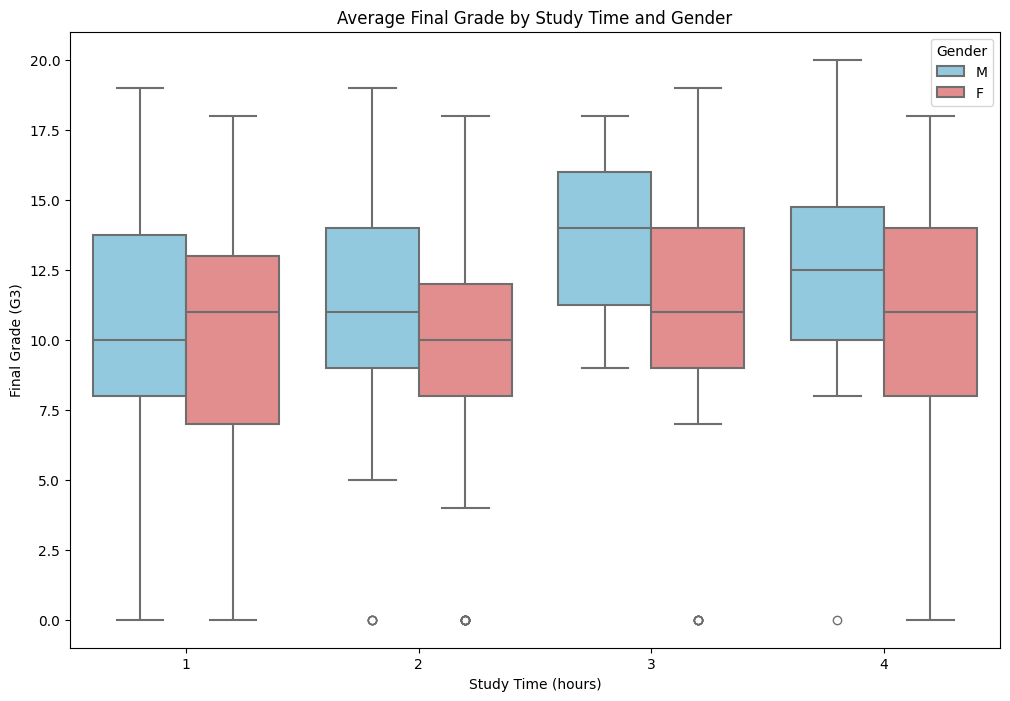

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x="studytime", y="G3", hue="sex", data=math_df, palette={"M": "skyblue", "F": "lightcoral"}, linewidth=1.5)
plt.title("Average Final Grade by Study Time and Gender")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade (G3)")
plt.legend(title="Gender")
plt.show()

This boxplot serves to find a relationship between the study time and the academic performance of the students based off of their sex. We can observe that the best performing students are those of who study for 3 hour. Dedicated study sessions lasting approximately 3 hours show consistently higher average grades across all grading periods (G1, G2, G3), suggesting a potential correlation between this study duration and improved academic performance. This observation implies that allocating around 3 hours to studying may be conducive to achieving better academic outcomes across multiple assessment periods.

We can see that studying drastically improves final grades. The next visualization will explore to see if parental education level is a factor into studying.

<ipython-input-38-c542b0fcd23b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[parent_education_labels[level] for level in avg_study_time_by_parent_education.index], y=avg_study_time_by_parent_education.values, palette="muted")


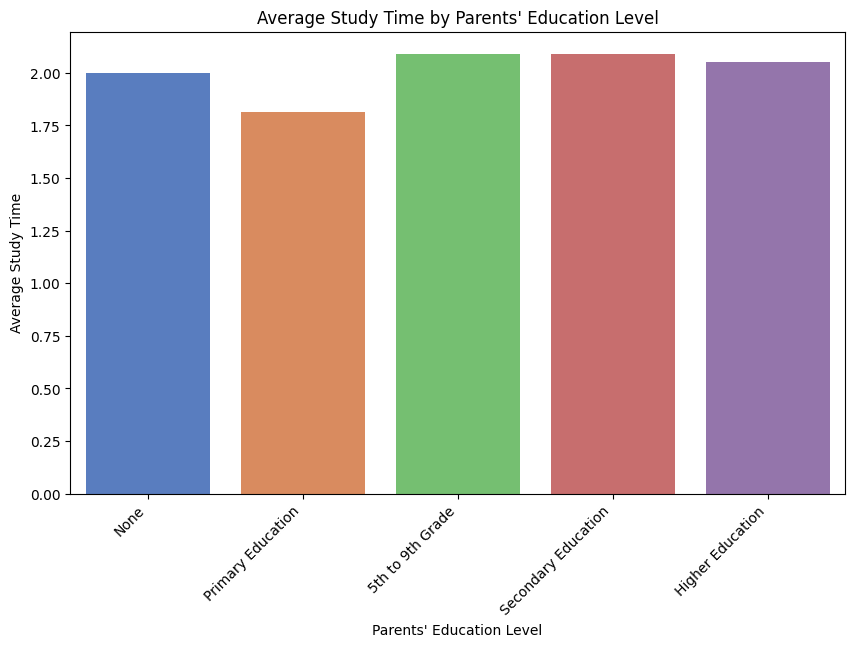

In [ ]:

avg_study_time_by_parent_education = math_df.groupby("Medu")["studytime"].mean()

parent_education_labels = {
    0: "None",
    1: "Primary Education",
    2: "5th to 9th Grade",
    3: "Secondary Education",
    4: "Higher Education"
}

plt.figure(figsize=(10, 6))
sns.barplot(x=[parent_education_labels[level] for level in avg_study_time_by_parent_education.index], y=avg_study_time_by_parent_education.values, palette="muted")
plt.title("Average Study Time by Parents' Education Level")
plt.xlabel("Parents' Education Level")
plt.ylabel("Average Study Time")
plt.xticks(rotation=45, ha="right")
plt.show()


When comparing the education levels of the students' parents to the average time a student studies for we found that, on average, students' study habits, as measured by study time, may not be significantly influenced by the educational attainment of their parents.

While parental education levels may not directly impact study time on average, it's essential to explore other potential predictors or mediators that may influence study habits.

**Activities:**

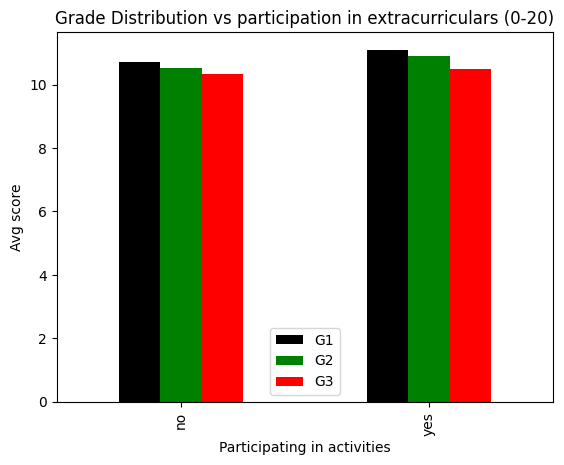

In [ ]:
Num_Activities = math_df[['activities']]
Activities_pivot = math_df.pivot_table(index=Num_Activities,values=['G1','G2','G3'],aggfunc='mean')
color = {"black","red","green"}
Activities_pivot.plot(kind='bar',color=color,stacked=False)
plt.xlabel('Participating in activities')
plt.ylabel('Avg score')
plt.title('Grade Distribution vs participation in extracurriculars (0-20)')
plt.show()

As mentioned before, one of our interests was to investigate the impact that extracurricular activities could have on grades. As seen above, the bar graph clearly shows that those who participate in extracurriculars have a higher average grading score. Now the question would be if the activites are actually impacting these average scores.

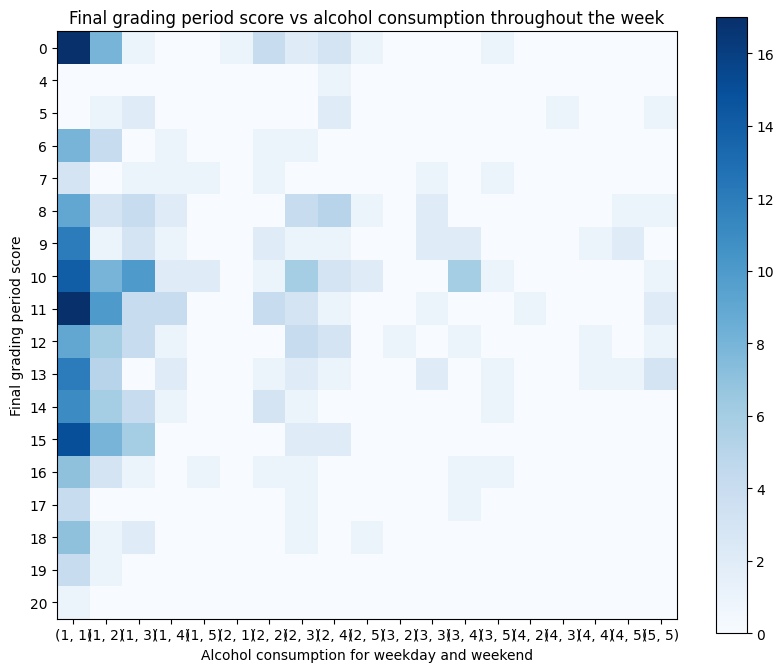

In [ ]:
import seaborn as sns
pivot_table = math_df.pivot_table(index='G3', columns=['Dalc','Walc'], aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
plt.imshow(pivot_table, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Final grading period score vs alcohol consumption throughout the week')
plt.xlabel('Alcohol consumption for weekday and weekend')
plt.ylabel('Final grading period score')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()

The figure above displays the alcohol consumption throughout the week (scale 1 to 5 where 5 means very high). Because the data for weekdays and weekends were taken separately, this is why the x-axis has 2 different numbers. By delving further into the data itself, we can see that some of the participants do consume some alcohol. Furthermore, the grades for these individuals do not seem to be very impacted by their alcohol consumption. Additionally, most of their alcohol consumption seems to be during the weekends. Ultimately, there is a small effect noticed, this is that the more alcohol consumption one has, the lower the grade for each apparent cluster in the data.

In [ ]:
#Randy Pham
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import graphviz
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Read in data sets of student demographics from Math Course
print ("Math Subject: ")
math_df = pd.read_csv("student-mat.csv", delimiter=";")


#Select features
features =  ['sex', 'address', 'famsize', 'Mjob', 'Fjob']
numerical_features = ['age', 'Medu', 'Fedu'] #(1)None/(2)Primary/(3)Some highschool/(4)Graduated Highschool/(5)College



def preprocess_features(df, features, numerical_features):
    df = df.copy()
    label_encoder = LabelEncoder()

    for feature in features:
        df[feature] = label_encoder.fit_transform(df[feature])

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    combined_features = features + numerical_features
    return df[combined_features]


#Select Features with the use of pre processing function
demo_math = preprocess_features(math_df,features, numerical_features)


#K Means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
math_clusters = kmeans.fit_predict(demo_math)


#Put grouped clusters into a dataframe
math_df['cluster'] = math_clusters

#Find the average of students with similar demographics
for i in range(k):
    print(f"Cluster {i}:")
    cluster_members = math_df[math_df['cluster'] == i]
    print(cluster_members[features + numerical_features].mean())
    print()

#Classify the grades of the students
def classify_grade(grade, max_grade=20):
    if grade >= 0.9 * max_grade:
        return 'A'
    elif grade >= 0.8 * max_grade:
        return 'B'
    elif grade >= 0.7 * max_grade:
        return 'C'
    elif grade >= 0.6 * max_grade:
        return 'D'
    else:
        return 'F'

#Pass the values of column G3 from math dataframe to the grades classification function
math_df['grade_letter'] = math_df['G3'].apply(classify_grade)

#Show the averages as letter grades per cluster
grade_distribution_per_cluster = math_df.groupby(['cluster', 'grade_letter'])['grade_letter'].count().unstack(fill_value=0)
print(grade_distribution_per_cluster)



Math Subject: 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
age     16.278351
Medu     3.773196
Fedu     3.484536
dtype: float64

Cluster 1:
age     17.018868
Medu     1.490566
Fedu     1.830189
dtype: float64

Cluster 2:
age     16.3125
Medu     3.5875
Fedu     3.3250
dtype: float64

Cluster 3:
age     16.135922
Medu     2.048544
Fedu     1.728155
dtype: float64

Cluster 4:
age     18.500000
Medu     2.306452
Fedu     1.887097
dtype: float64

grade_letter   A   B   C   D   F
cluster                         
0             10  10  17  11  49
1              2   1   6   9  35
2              2   5  17  15  41
3              3   5  13  19  63
4              1   1   7   8  45


<ipython-input-41-a5b05580096e>:54: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cluster_members[features + numerical_features].mean())
<ipython-input-41-a5b05580096e>:54: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cluster_members[features + numerical_features].mean())
<ipython-input-41-a5b05580096e>:54: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns 

In [ ]:
#Martin De Guzman
#Portugese subject
print ("Portugese Subject: ")
port_df = pd.read_csv("student-por.csv", delimiter=";")
#Select Features with the use of pre processing function
demo_port = preprocess_features(port_df,features, numerical_features)

#K Means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
port_clusters = kmeans.fit_predict(demo_port)


#Put grouped clusters into a dataframe
port_df['cluster'] = port_clusters

#Find the average of students with similar demographics
for i in range(k):
    print(f"Cluster {i}:")
    cluster_members = math_df[port_df['cluster'] == i]
    print(cluster_members[features + numerical_features].mean())
    print()

#Classify the grades of the students
def classify_grade(grade, max_grade=20):
    if grade >= 0.9 * max_grade:
        return 'A'
    elif grade >= 0.8 * max_grade:
        return 'B'
    elif grade >= 0.7 * max_grade:
        return 'C'
    elif grade >= 0.6 * max_grade:
        return 'D'
    else:
        return 'F'

#Pass the values of column G3 from math dataframe to the grades classification function
port_df['grade_letter'] = port_df['G3'].apply(classify_grade)

#Show the averages as letter grades per cluster
grade_distribution_per_cluster = port_df.groupby(['cluster', 'grade_letter'])['grade_letter'].count().unstack(fill_value=0)
print(grade_distribution_per_cluster)

Portugese Subject: 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
age     15.868421
Medu     2.394737
Fedu     2.118421
dtype: float64

Cluster 1:
age     16.495327
Medu     3.233645
Fedu     2.887850
dtype: float64

Cluster 2:
age     17.528736
Medu     2.620690
Fedu     2.436782
dtype: float64

Cluster 3:
age     16.753247
Medu     2.961039
Fedu     2.714286
dtype: float64

Cluster 4:
age     16.854167
Medu     2.125000
Fedu     2.187500
dtype: float64

grade_letter  A   B   C   D   F
cluster                        
0             1   9  15  38  63
1             4  22  31  44  39
2             2  14  29  33  82
3             5  18  25  20  39
4             5   2  12  19  78


<ipython-input-42-2db552dabac4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_members = math_df[port_df['cluster'] == i]
<ipython-input-42-2db552dabac4>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cluster_members[features + numerical_features].mean())
<ipython-input-42-2db552dabac4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_members = math_df[port_df['cluster'] == i]
<ipython-input-42-2db552dabac4>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silen

K means clustering analysis on students in  Portuguese class:

Cluster 0: Youngest students on average (about 15.9 years old), with the lowest level of parental education. This suggests a group of younger students whose parents may not have had as much formal education. The cluster also has a high concentration of lower grades (D and F), suggesting that the younger students from less educated families may struggle academically.

Cluster 1: Students are slightly older on average (about 16.5 years old), with higher parental education levels, especially from mothers. This cluster represents students from more educated family backgrounds. Cluster 1 shows a more balanced distribution of grades, with a significant number of B and C grades, indicating better academic performance. This may reflect the positive influence of higher parental education levels.

Cluster 2: Oldest students on average (about 17.5 years old), with parental education levels slightly above cluster 0 but below clusters 1 and 3. This might indicate students who are older for their grade level, possibly due to late school entry or grade repetition, coming from moderately educated families. Cluster 2 has a notable number of F grades but also maintains a presence across other grades, suggesting variability in academic success among the oldest students.



Cluster 3: Students have an average age of about 16.8 years, with relatively high parental education levels. This group likely consists of students from families that value education highly.
Cluster 3 has a relatively even distribution of grades from A to D but also includes a fair number of F grades, indicating a range of academic outcomes among students from more educated families.

Cluster 4: Students are close in age to cluster 3 (about 16.9 years old) but have the lowest parental education levels after cluster 0. This suggests a mix of older students coming from less educated families. Cluster 4 is characterized by a large number of F grades, indicating significant academic challenges among students from less educated families, despite being among the older students.

Overall Interpretation
The data suggests that age and parental education levels are significant factors in the academic performance of students studying Portuguese. Older students (Clusters 2, 3, and 4) and those from more educated families (Clusters 1 and 3) tend to perform better, although there are exceptions, such as the high number of F grades in Cluster 4. This analysis could help educators identify students who may need additional support based on their cluster characteristics.


In [ ]:
#Shubham Kusre (KNN Math Dataset)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Read in data sets of student demographics from Math Course
print("Math Subject: ")
math_df = pd.read_csv("student-mat.csv", delimiter=";")

# Select features
features = ['sex', 'famsize', 'Mjob', 'Fjob']
numerical_features = ['age', 'Walc', 'Medu', 'Fedu']  # 'Walc' represents weekend alcohol consumption rate

# Preprocess features
def preprocess_features(df, features, numerical_features):
    df = df.copy()
    label_encoder = LabelEncoder()

    for feature in features:
        df[feature] = label_encoder.fit_transform(df[feature])

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    combined_features = features + numerical_features
    return df[combined_features]

# Select Features with the use of pre-processing function
demo_math = preprocess_features(math_df, features, numerical_features)

# Classify grades using the classify_grade function
def classify_grade(grade, max_grade=20):
    if grade >= 0.9 * max_grade:
        return 'A'
    elif grade >= 0.8 * max_grade:
        return 'B'
    elif grade >= 0.7 * max_grade:
        return 'C'
    elif grade >= 0.6 * max_grade:
        return 'D'
    else:
        return 'F'

# Apply classify_grade function to create 'grade_letter' column
math_df['grade_letter'] = math_df['G3'].apply(classify_grade)

# Split data into train and test sets
X = demo_math
y = math_df['grade_letter']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# New Instance
new_instance = pd.DataFrame({
    'sex': ['M'],            # Gender (Female)
    'famsize': ['LE3'],      # Family size (Less than or equal to 3)
    'Mjob': ['health'],      # Mother's job
    'Fjob': ['other'],       # Father's job
    'age': [18],             # Age
    'Walc': [4],             # Weekend alcohol consumption rate
    'Medu': [4],             # Mother's education level
    'Fedu': [3]              # Father's education level
})

# Preprocess the new instance
new_instance_processed = preprocess_features(new_instance, features, numerical_features)

# Print the new instance
print("New Instance 1:")
print(new_instance)

# Predict the class label for the new instance
predicted_class = knn.predict(new_instance_processed)

print("\nPredicted Grade for New Instance 1:", predicted_class)

# New Instance
another_new_instance = pd.DataFrame({
    'sex': ['M'],            # Gender (Male)
    'famsize': ['GT3'],      # Family size (Greater than 3)
    'Mjob': ['teacher'],     # Mother's job
    'Fjob': ['services'],    # Father's job
    'age': [17],             # Age
    'Walc': [2],             # Weekend alcohol consumption rate
    'Medu': [3],             # Mother's education level
    'Fedu': [2]              # Father's education level
})

# Preprocess the new instance
another_new_instance_processed = preprocess_features(another_new_instance, features, numerical_features)

# Predict the class for the new instance
predicted_class_another = knn.predict(another_new_instance_processed)

# Print the new instance and the predicted class
print("New Instance 2:")
print(another_new_instance)
print("\nPredicted Grade for New Instance 2:", predicted_class_another)


Math Subject: 
Accuracy: 0.5822784810126582
Precision: 0.4647103950901419
New Instance 1:
  sex famsize    Mjob   Fjob  age  Walc  Medu  Fedu
0   M     LE3  health  other   18     4     4     3

Predicted Grade for New Instance 1: ['F']
New Instance 2:
  sex famsize     Mjob      Fjob  age  Walc  Medu  Fedu
0   M     GT3  teacher  services   17     2     3     2

Predicted Grade for New Instance 2: ['F']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MATH SUBJECT MODEL**

The accuracy of this model is approximately 0.58, indicating that it correctly predicts the grades or performance level for about 58% of the instances in the dataset. Precision, which measures the proportion of correctly predicted positive cases among all instances predicted as positive, is approximately 0.46. This means that around 46% of the instances predicted to have a certain grade actually have that grade.

Examining the predictions for two random new instances provides insight into how the model performs in practice. For the first new instance, which corresponds to a male student from a small family, with parents in the health and other occupations, aged 18, with moderate alcohol consumption, and both parents having relatively high education levels, the model predicts a grade of 'F'. Similarly, for the second instance, a male student from a larger family, with parents in teaching and service occupations, aged 17, with lower alcohol consumption, and moderate parental education levels, the model also predicts a grade of 'F'.

Overall, the data provided is heavily biased towards students failing which may be the reason as to why the model predicts a grade F for both instances. Investigating potential biases in the data could help ensure fair and reliable predictions for all students.

In [ ]:
#Shubham Kusre (KNN portuguese Dataset)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Read in data sets of student demographics from Math Course
print("Portuguese Subject: ")
math_df = pd.read_csv("student-por.csv", delimiter=";")

# Select features
features = ['sex', 'famsize', 'Mjob', 'Fjob']
numerical_features = ['age', 'Walc', 'Medu', 'Fedu']  # 'Walc' represents weekend alcohol consumption rate

# Preprocess features
def preprocess_features(df, features, numerical_features):
    df = df.copy()
    label_encoder = LabelEncoder()

    for feature in features:
        df[feature] = label_encoder.fit_transform(df[feature])

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    combined_features = features + numerical_features
    return df[combined_features]

# Select Features with the use of pre-processing function
demo_math = preprocess_features(math_df, features, numerical_features)

# Classify grades using the classify_grade function
def classify_grade(grade, max_grade=20):
    if grade >= 0.9 * max_grade:
        return 'A'
    elif grade >= 0.8 * max_grade:
        return 'B'
    elif grade >= 0.7 * max_grade:
        return 'C'
    elif grade >= 0.6 * max_grade:
        return 'D'
    else:
        return 'F'

# Apply classify_grade function to create 'grade_letter' column
math_df['grade_letter'] = math_df['G3'].apply(classify_grade)

# Split data into train and test sets
X = demo_math
y = math_df['grade_letter']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Create a new instance (example)
new_instance = pd.DataFrame({
    'sex': ['M'],            # Gender (Female)
    'famsize': ['LE3'],      # Family size (Less than or equal to 3)
    'Mjob': ['health'],      # Mother's job
    'Fjob': ['other'],       # Father's job
    'age': [20],             # Age
    'Walc': [1],             # Weekend alcohol consumption rate
    'Medu': [2],             # Mother's education level
    'Fedu': [3]              # Father's education level
})

# Preprocess the new instance
new_instance_processed = preprocess_features(new_instance, features, numerical_features)

# Print the new instance
print("New Instance 1:")
print(new_instance)

# Predict the class label for the new instance
predicted_class = knn.predict(new_instance_processed)

print("\nPredicted Grade for New Instance 1:", predicted_class)

# Create another new instance with different values
another_new_instance = pd.DataFrame({
    'sex': ['F'],            # Gender (Male)
    'famsize': ['GT3'],      # Family size (Greater than 3)
    'Mjob': ['other'],       # Mother's job
    'Fjob': ['services'],    # Father's job
    'age': [17],             # Age
    'Walc': [2],             # Weekend alcohol consumption rate
    'Medu': [3],             # Mother's education level
    'Fedu': [2]              # Father's education level
})

# Preprocess the new instance
another_new_instance_processed = preprocess_features(another_new_instance, features, numerical_features)

# Predict the class for the new instance
predicted_class_another = knn.predict(another_new_instance_processed)

# Print the new instance and the predicted class
print("New Instance 2:")
print(another_new_instance)
print("\nPredicted Grade for New Instance 2:", predicted_class_another)

Portuguese Subject: 
Accuracy: 0.38461538461538464
Precision: 0.35379587732528905
New Instance 1:
  sex famsize    Mjob   Fjob  age  Walc  Medu  Fedu
0   M     LE3  health  other   20     1     2     3

Predicted Grade for New Instance 1: ['F']
New Instance 2:
  sex famsize   Mjob      Fjob  age  Walc  Medu  Fedu
0   F     GT3  other  services   17     2     3     2

Predicted Grade for New Instance 2: ['F']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**PORTUGUESE SUBJECT MODEL**

The accuracy of this model is approximately 0.38, indicating that it correctly predicts the grades or performance level for about 38% of the instances in the dataset. Precision, which measures the proportion of correctly predicted positive cases among all instances predicted as positive, is approximately 0.35. This means that around 35% of the instances predicted to have a certain grade actually have that grade.

Examining the predictions for two new instances provides insight into the model's performance. For the first new instance, a male student from a small family (LE3), with parents in the health and other occupations, aged 20, with low alcohol consumption, and relatively lower parental education levels, the model predicts a grade of 'F'. Similarly, for the second instance, a female student from a larger family (GT3), with parents in other and service occupations, aged 17, with moderate alcohol consumption, and moderate parental education levels, the model also predicts a grade of 'F'.

The consistent prediction of 'F' for both instances suggests that the model might have limitations or biases. It's possible that the features provided are not sufficient to accurately predict grades, or that there are underlying patterns not captured by the current features. Additionally, investigating potential biases in the data or model predictions could help ensure fair and reliable predictions for all students.